## TP 5
## MEMBRES DU GROUPES:
##    GROUPE 2 CONSTITUE DE :
##        - LEPAFO MOFFO Baurel               21S2782
##        - MANFOUO SELATSA Ridano            16U2848
##        - TEINGA KAMGUEN Emmanuel Rufin     21S2822
##        - MEBODO ONOMO JUSTIN JORDAN        19M2217

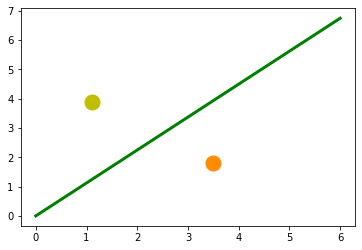

In [ ]:
#Dans ce bout de code nous separons lineairement 2 points (3.5,1.8) et (1.1,1.9)
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0,7)
fig,ax = plt.subplots()

ax.plot(3.5,1.8,"or", color="darkorange",markersize=15)
ax.plot(1.1,3.9,"oy",markersize=15)

point_on_line = (4,4.5)
m=point_on_line[1] / point_on_line[0]
ax.plot(X,m*X,"g-",linewidth=3) ## ici on voit bien que tout point tel que m*a1 -a2 !=0 n'est pas sur la droite(ou A=(a1,a2) et un point)
plt.show()

In [ ]:
## Ici nous allons verifier si les proprites pour nos points que sont pour un point P(p1,p2) :
## en-dessous de la droite m.p1 -p2>0, sur la ligne droite m.p1 - p2 =0, au-dessus de la ligne droite m.p1-p2<0
##sont vraies

lemon =(1.1,3.9)
orange = (3.5,1.8)
m = 4.5/4

print(orange[0]*m-orange[1])
print(lemon[0]*m-lemon[1])

2.1375
-2.6624999999999996


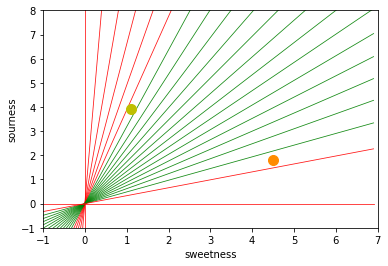

In [ ]:
## Dans ce bout de code il est question de tracer plusieurs lignes questions de voir comment elles separent les fruits
##

def create_distance_function(a,b,c):
    
    def distance(x,y):
        """
            cette fonction retourne un tuple (d,pos) tel que d est la distance
            et si pos == -1 le point est au dessus de la ligne, 0 sur la ligne et 1 au dessus de
            la ligne
        """
        
        nom = a*x + b*y +c
        if nom ==0:
            pos =0
        elif(nom<0 and b<0) or (nom>0 and b>0):
            pos =0
        else:
            pos =1
        return (np.absolute(nom)/np.sqrt(a ** 2 + b**2),pos)
    return distance

orange =(4.5,1.8)
lemon = (1.1,3.9)
fruits_coords =[orange,lemon]
fig,ax =plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")

x_min, x_max = -1,7
y_min,y_max =-1,8
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

X = np.arange(x_min,x_max,0.1)
step = 0.05

for x in np.arange(0,1+step,step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope,-1,0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if(results[0][1] != results[1][1]):
        ax.plot(X,Y,"g-",linewidth=0.8,alpha=0.9)
    else:
        ax.plot(X,Y,"r-",linewidth=0.8,alpha=0.9)

size = 10

for (index,(x,y)) in enumerate(fruits_coords):
    if index==0:
        ax.plot(x,y,"o",color="darkorange",markersize=size)
    else:
        ax.plot(x,y,"oy",markersize=size)

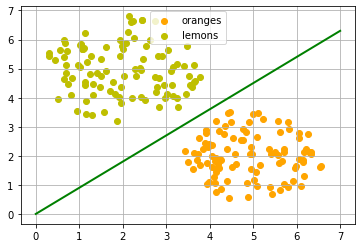

In [ ]:
## dans cette section, nous creons 2 classes et augmentons le nombre d<oranges et de lemons

def points_within_circle(radius,center=(0,0), number_of_points = 100):
    center_x,center_y = center
    r= radius *np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x,y

X = np.arange(0,8)
fig,ax = plt.subplots()
oranges_x,oranges_y = points_within_circle(1.6,(5,2),100)
lemons_x,lemons_y = points_within_circle(1.9,(2,5),100)
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label ="lemons")
ax.plot(X,0.9 * X, "g-",linewidth=2)

ax.legend()
ax.grid()
plt.show()

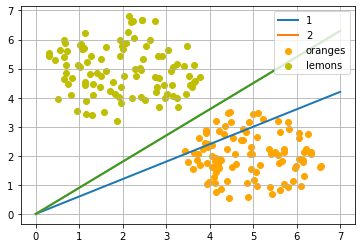

In [ ]:
## Dans ce bout de code on veut faire en sorte d'ajuster le 
# pente d'une droite de sorte a faire passer si on le veut des point qu dessus ou en dessous d'une droite 
from itertools import repeat
from random import shuffle

X = np.arange(0,8)
fig,ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
fruits = list(zip(oranges_x,oranges_y,repeat(0,len(oranges_x))))
fruits += list(zip(lemons_x,lemons_y,repeat(1,len(oranges_x))))

shuffle(fruits)

def adjust(learning_rate = 0.3, slope=0.3):
    line = None
    counter = 0
    for x,y,label in fruits:
        res = slope *x -y
        if label == 0 and res<0:
            ## le point est en dessous de la ligne on incremente la pente
            slope += learning_rate
            counter += 1
            ax.plot(X, slope*X,linewidth=2,label = str(counter))
        elif label == 1 and res >0:
            ## le point est au dessus de la ligne on decremente la pente
            slope -= learning_rate
            counter += 1
            ax.plot(X,slope*X,linewidth=2,label = str(counter))
    return slope

slope = adjust()
ax.plot(X,slope*X,linewidth=2)
ax.legend()
ax.grid()
plt.show()

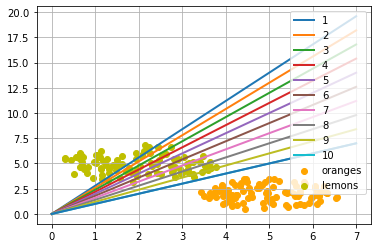

0.9999999999999996


In [ ]:
## ici nous voulons modifier la pente afin de creer de nouvelles droites dans la section des lemon
X = np.arange(0,8)
fig,ax = plt.subplots()

ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")

slope = adjust(learning_rate = 0.2,slope=3)
ax.plot(X,slope*X,linewidth=2)
ax.legend()
ax.grid()
plt.show()

print(slope)

In [ ]:
class Perceptron:
    def __init__(self,weights):
        self.weights = np.array(weights)
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum

p = Perceptron(weights = [-0.45,0.5])

for point in zip(oranges_x[:10],oranges_y[:10]):
    res = p(point)
    print(res,end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end =", ")

-1.7125111006912288, -0.7410086271586027, -0.8586516010625604, -1.8194006619062646, -1.652562042567028, -1.1598165736424848, -1.7829887137614788, -1.6810784587874044, -1.8336369923849984, -2.0961077690098184, 2.0406113567463042, 2.0823608905487694, 2.60924078878066, 2.4514574960163866, 1.1072259840879883, 2.143048663465328, 2.708064858525508, 2.4405813374630156, 1.6918293483636004, 2.481413328187017, 

In [ ]:
from collections import Counter
evaluation = Counter()

for point in zip(oranges_x,oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
    
for point in zip(lemons_x,lemons_y):
    res = p(point)
    if res >=0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] +=1

print(evaluation)

Counter({'corrects': 200})


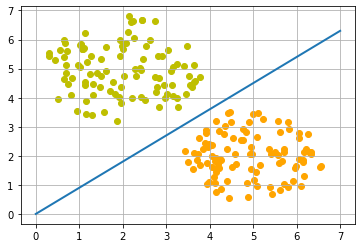

0.9


In [ ]:
import time
slope = 0.1

X = np.arange(0,8)
fig,ax=plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
slope = 0.45/0.5
ax.plot(X,slope*X,linewidth=2)

ax.grid()
plt.show()
print(slope)

In [ ]:
from sklearn.model_selection import train_test_split
import random

oranges= list(zip(oranges_x,oranges_y))
lemons = list(zip(lemons_x,lemons_y))

labelled_data = list(zip(oranges+lemons,[0]*len(oranges) +[1]*len(lemons)))

random.shuffle(labelled_data)

data,labels = zip(*labelled_data)
res = train_test_split(data, labels,train_size  =0.8,test_size = 0.2,random_state =42)
train_data,test_data,train_labels,test_labels=res
print(train_data[:10],train_labels[:10])

[(2.7358682409383412, 4.72823165703832), (5.395905819090795, 0.9102495419708527), (6.532314953064387, 1.6004767474005765), (2.4171147056417595, 4.020179830662686), (3.666146646351079, 4.55785023224455), (0.7458507726196402, 4.486807295076407), (5.0982051003650986, 0.9774872234914163), (3.760557504388963, 2.616085921816733), (3.944517687493092, 1.757157431660255), (4.5749543233254535, 2.0627779480479944)] [1, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [ ]:
## on met a jour ici les poids en fonction des erreur possibles issu de la prediction
## formule wi = wi +dela*wi
class Perceptron:
    def __init__(self,weights,learning_rate=0.1):
        ## on utilisera la taille des poids pour definir le valeurs d'entrees
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if x<0:
            return 0
        else:
            return 1
    def __call__(self,in_data):
        weighted_input = self.weights*in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self,target_result,calculated_result,in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data *self.learning_rate
            self.weights += correction
            
    def evaluate(self,data,labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] +=1
        return evaluation
p= Perceptron(weights=[0.1,0.1],learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index],
            p(train_data[index]),
            train_data[index])
    
evaluation = p.evaluate(train_data,train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data,test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.44989998  1.38682402]


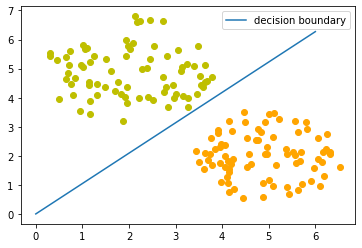

[-1.44989998  1.38682402]


In [ ]:
### maintenant representons notre ligne de decision pour nos donnees

X = np.arange(0,7)
fig,ax= plt.subplots()

lemons =[train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x,lemons_y=zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] ==0]
oranges_x,oranges_y = zip(*oranges)

ax.scatter(oranges_x,oranges_y,c="orange")
ax.scatter(lemons_x,lemons_y,c="y")

w1 = p.weights[0]
w2 = p.weights[1]

m = -w1/w2
ax.plot(X,m*X,label= "decision boundary")
ax.legend()
plt.show()
print(p.weights)

1 -8.775230111342413 [-1.51877175 -0.17307486] (5.395905819090795, 0.9102495419708527)
3 0.7682995176999452 [-0.79363733  1.03297909] (2.4171147056417595, 4.020179830662686)
62 27.261904262488095 [-2.03725091  0.07472886] (4.145378590218801, 3.194167436192009)
64 1.0454823087624827 [-1.44989998  1.38682402] (1.9578364432338728, 4.3736505470325175)


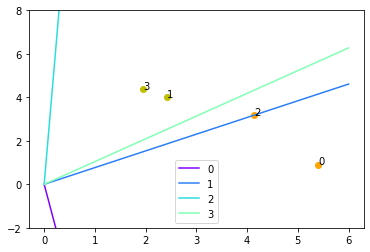

In [ ]:
## regardons notre algorithme en mouvement avec changement de pentes
## dans ce bout de code chacun des point modifi la pente de la droite d'origine et ce changement est ainsi numerote our chaque points
import matplotlib.cm as cm

p = Perceptron(weights=[0.1,0.1], learning_rate =0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0,1,number_of_colors))

fig,ax =plt.subplots()

ax.set_xticks(range(8))

ax.set_ylim([-2,8])

counter = 0

for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],p(train_data[index]), train_data[index])
    
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] ==0 else "y"
        ax.scatter(train_data[index][0],train_data[index][1],color=color)
        ax.annotate(str(counter),(train_data[index][0],train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index,m,p.weights,train_data[index])
        ax.plot(X,m*X,label=str(counter),color=colors[counter])
        counter +=1

ax.legend()
plt.show()

## 2. Simple Reseaux de neuronnes

[]

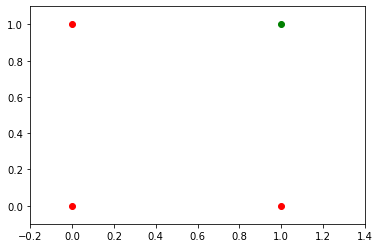

In [ ]:
## ici on implemente les point constituant la fonction logique Et
fig,ax = plt.subplots()
xmin,xmax = -0.2,1.4

X = np.arange(xmin,xmax,0.1)
ax.scatter(0,0,color="r")
ax.scatter(0,1,color="r")
ax.scatter(1,0,color="r")
ax.scatter(1,1,color="g")
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
m=-1
plt.plot()

[]

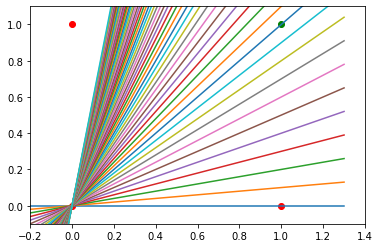

In [ ]:
#creons plusieurs droites pour notre Fonction logique And

fig,ax = plt.subplots()
xmin,xmax = -0.2,1.4
X = np.arange(xmin,xmax,0.1)
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])

m=-1
for m in np.arange(0,6,0.1):
    ax.plot(X,m*X)
ax.scatter(0,0,color="r")
ax.scatter(0,1,color="r")
ax.scatter(1,0,color="r")
ax.scatter(1,1,color="g")
plt.plot()

In [ ]:
#nous remarquons qu'aucun separateur ne seapre bien les classes
# il nous faut une droit y=m*x + c(intercepteur) avec c different de 0

[]

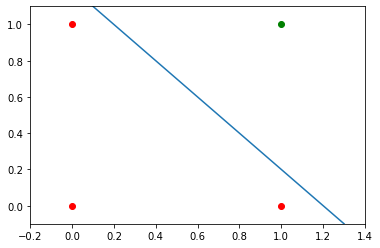

In [ ]:
fig,ax = plt.subplots()
xmin,xmax = -0.2,1.4

X = np.arange(xmin,xmax,0.1)
ax.scatter(0,0,color="r")
ax.scatter(0,1,color="r")
ax.scatter(1,0,color="r")
ax.scatter(1,1,color="g")

ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
m,c = -1,1.2
ax.plot(X, m*X + c)
plt.plot()

In [ ]:
# ici nous voulons creer un model qui permet le moins de modifications possible dans notre reseau de neuronnes
# pour cela on vas ajouter un biaias b(qui est constant) en entrees on pourra determiner la droite de decision avec un intercepteur c non null

import numpy as np
from collections import Counter

class Perceptron:
    def __init__(self,weights,bias=1,learning_rate=0.3):
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if x<=0:
            return 0
        else:
            return 1
    
    def __call__(self, in_data):
        in_data= np.concatenate((in_data,[self.bias]))
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)
    
    def adjust(self,target_result,in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)
        calculated_result = self(in_data)
        error = target_result - calculated_result
        
        if error != 0:
            in_data =np.concatenate((in_data, [self.bias]))
            correction = error * in_data *self.learning_rate
            self.weights += correction
    
    def evaluate(self,data,labels):
        evaluation =Counter()
        for sample,label in zip(data,labels):
            result = self(sample)
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

In [ ]:
# ici nous evaluons notre modele
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0,2,(2,))
        yield(s,1) if s[0] == 1 and s[1] == 1 else (s,0)

p = Perceptron(weights=[0.3,0.3,0.3], learning_rate=0.2)

for in_data,label in labelled_samples(30):
    p.adjust(label,in_data)

test_data,test_labels = list(zip(*labelled_samples(30)))
evaluation =p.evaluate(test_data,test_labels)
print(evaluation)

Counter({'correct': 30})


-0.33333333333333326 1.0000000000000002


[]

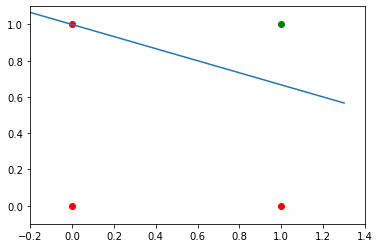

In [ ]:
## affichons notre graphique base sur le perceptron avec bias

fig,ax = plt.subplots()
xmin,xmax = -0.2,1.4
X = np.arange(xmin,xmax,0.1)
ax.scatter(0,0,color="r")
ax.scatter(0,1,color="r")
ax.scatter(1,0,color="r")
ax.scatter(1,1,color="g")
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
"""
 calcul de c et de m
"""
m=-p.weights[0] / p.weights[1]
c=-p.weights[2] / p.weights[1]

print(m,c)
ax.plot(X,m * X + c)
plt.plot()

In [ ]:
## ici on veut tracer un perceptron qui separe des donnees sur un dataset de sklearn

from sklearn.datasets import make_blobs

n_samples = 250

samples,labels = make_blobs(n_samples=n_samples,centers=([2.5,3],[6.7,7.9]), random_state =0)

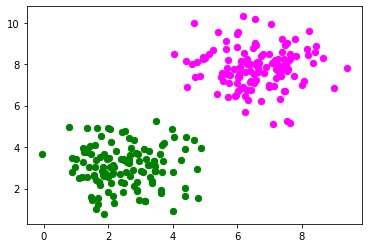

In [ ]:
# ici nous representons nos donnees
colours = ('green','magenta','blue','cyan','yellow','red')
fig,ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:,0],samples[labels==n_class][:,1],
              c=colours[n_class],s=40,label=str(n_class))
    

In [ ]:
n_learn_data = int(n_samples *0.8)
learn_data,test_data = samples[:n_learn_data],samples[-n_learn_data:]# decoupage des donnees

learn_labels,test_labels = labels[:n_learn_data], labels[-n_learn_data:] # decoupage des labels

p=Perceptron(weights = [0.3,0.3,0.3],learning_rate=0.8)

for sample, label in zip(learn_data,learn_labels):
    p.adjust(label,sample)

evaluation = p.evaluate(learn_data,learn_labels)

print(evaluation)

Counter({'correct': 200})


-1.5513529034664024 11.736643489707035


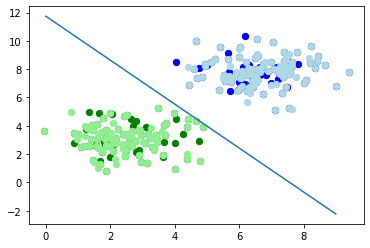

In [ ]:
fig, ax= plt.subplots()
## affichage des donnees apprisent
colours = ("green",'blue')

for n_class in range(2):
    ax.scatter(learn_data[learn_labels == n_class][:,0],
               learn_data[learn_labels == n_class][:,1],
               c= colours[n_class],s=40,label=str(n_class))

colours = ('lightgreen','lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels == n_class][:,0],
               test_data[test_labels == n_class][:,1],
               c= colours[n_class],s=40,label=str(n_class))

X = np.arange(np.max(samples[:,0]))
m= -p.weights[0] / p.weights[1]
c= -p.weights[2] / p.weights[1]

print(m,c)
ax.plot(X, m*X+c)
plt.plot()
plt.show()

In [ ]:
## ici nous faisons L'esercice de classification avec la fontion logique AND respectant un tableau donne


p= Perceptron(weights=[0.3,0.3,0.3],bias = 1,learning_rate=0.2)
def class_examples(n):
    for i in range(n):
        s=np.random.random((2,))
        yield(s,1) if s[0]>=0.5 and s[1] >=0.5 else (s,0)

for in_data,label in class_examples(30):
    p.adjust(label,in_data)
test_data, test_labels = list(zip(*class_examples(60)))
evaluation = p.evaluate(test_data,test_labels) 
print(evaluation)

Counter({'correct': 52, 'wrong': 8})


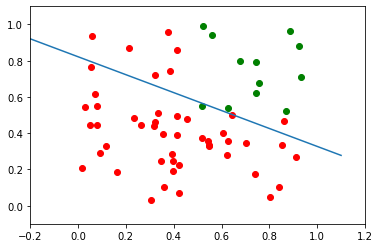

In [ ]:
## maintenant observons pourquoi nos donnees ne sont pas lineairement separable

ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zereos = [test_data[i] for i in range(len(test_data)) if test_labels[i] ==0]

fig,ax = plt.subplots()
xmin,xmax =-0.2,1.2
X,Y = list(zip(*ones))
ax.scatter(X,Y,color='g')
X,Y  = list(zip(*zereos))
ax.scatter(X,Y,color="r")
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
m= -p.weights[0] / p.weights[1]
c= -p.weights[2] / p.weights[1]
X = np.arange(xmin,xmax,0.1)
ax.plot(X,m*X+c,label="decision boundary")

In [ ]:
## observons la valeurs de x2 pour des donnees lineairement separaple en considerant le tableau precedant 

p= Perceptron(weights=[0.3,0.3,0.3],bias = 1,learning_rate=0.4)
def class_examples(n):
    for i in range(n):
        s=np.random.random((2,))
        yield(s,0) if s[0]<0.5 else (s,1)

for in_data,label in class_examples(300):
    p.adjust(label,in_data)
test_data, test_labels = list(zip(*class_examples(500)))
print(p.weights)
p.evaluate(test_data,test_labels)

[ 1.86392101 -0.05403579 -0.9       ]


Counter({'correct': 499, 'wrong': 1})

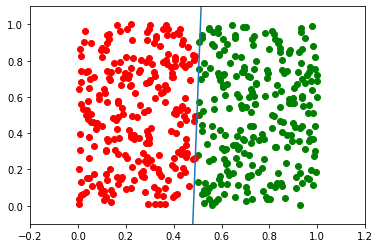

In [ ]:
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zereos = [test_data[i] for i in range(len(test_data)) if test_labels[i] ==0]

fig,ax = plt.subplots()
xmin,xmax =-0.2,1.2
X,Y = list(zip(*ones))
ax.scatter(X,Y,color='g')
X,Y  = list(zip(*zereos))
ax.scatter(X,Y,color="r")
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
m= -p.weights[0] / p.weights[1]
c= -p.weights[2] / p.weights[1]
X = np.arange(xmin,xmax,0.1)
ax.plot(X,m*X+c,label="decision boundary")

In [ ]:
## ici on peut dire que la frontiere de decision separe bien nos donnees, et que 
## si x2 >= 0.5 on remarque que tous les points vert sont d'un cote